In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import  BytesIO

In [2]:
%matplotlib inline

# Examine Account History

In [3]:
filename = 'comcast_account_history_converted.csv'

In [4]:

df_orig = pd.read_csv(filename, delimiter=";", skiprows=0)#, encoding='ascii')


df_orig.ix[df_orig.Vorgang.apply(lambda x: 'bertrag' in x), 'Vorgang'] = 'Uberweisung'

df_orig['Prefix'] = df_orig.Buchungstext.str.split(':').apply(lambda x: x[0])
df_orig.Buchungstext = df_orig.Buchungstext.str.split(':').apply(lambda x: ':'.join(x[1:]))
df_orig.head()

,Buchungstag,Wertstellung (Valuta),Vorgang,Buchungstext,Umsatz in EUR,Prefix
0,23.09.2016,23.09.2016,Uberweisung,Dr. Walter Kraemer Kto/IBAN: DE16542900001007...,-1222.61,Empf�nger
1,23.09.2016,23.09.2016,Uberweisung,Dr. Walter Kraemer Kto/IBAN: DE16542900001007...,-1222.61,Empf�nger
2,23.09.2016,23.09.2016,Uberweisung,Dr Walter Kraemer Kto/IBAN: DE165429000010074...,-1222.61,Empf�nger
3,23.09.2016,23.09.2016,Uberweisung,Dr. Walter Kraemer Kto/IBAN: DE16542900001007...,-1222.61,Empf�nger
4,23.09.2016,23.09.2016,Uberweisung,Dr. Walter Kraemer Kto/IBAN: DE16542900001007...,-1222.61,Empf�nger


In [5]:
pd.to_datetime

<function pandas.tseries.tools.to_datetime>

In [6]:
df_orig['Buchungstag'] = pd.to_datetime(df_orig['Buchungstag'], dayfirst=True)
df_orig = df_orig.sort_values(by='Buchungstag')
df_orig = df_orig.reset_index()
df_orig

,index,Buchungstag,Wertstellung (Valuta),Vorgang,Buchungstext,Umsatz in EUR,Prefix
0,257,2015-09-24,24.09.2015,Uberweisung,"Manuel Osterrieter, Christoph Gabry schBuchun...",872.43,Auftraggeber
1,256,2015-09-29,29.09.2015,Uberweisung,"Manuel Osterrieter, Christoph Gabry schBuchun...",476.59,Auftraggeber
2,254,2015-10-05,05.10.2015,Lastschrift/Belast.,ORTERER9120 Buchungstext: ELV94312605 02.10 1...,-18.59,Auftraggeber
3,255,2015-10-05,05.10.2015,Lastschrift/Belast.,NETTO SAGT DANKE NMD8448 Buchungstext: 021019...,-15.70,Auftraggeber
4,253,2015-10-06,06.10.2015,Lastschrift/Belast.,628 EDEKA MUENCHEN GUARDINI Buchungstext: EC ...,-6.23,Auftraggeber
5,252,2015-10-07,07.10.2015,Lastschrift/Belast.,NETTO SAGT DANKE NMD8448 Buchungstext: 061016...,-14.85,Auftraggeber
6,251,2015-10-07,07.10.2015,Uberweisung,Simon Freitag Buchungstext: MIETE OKT 15 SIMO...,565.00,Auftraggeber
7,250,2015-10-12,12.10.2015,Lastschrift/Belast.,NETTO SAGT DANKE NMD8448 Buchungstext: 101019...,-8.91,Auftraggeber
8,249,2015-10-12,12.10.2015,Lastschrift/Belast.,NETTO SAGT DANKE NMD8448 Buchungstext: 091014...,-7.96,Auftraggeber
9,248,2015-10-13,13.10.2015,Lastschrift/Belast.,PENNY SAGT DANKE. 66300198 Buchungstext: 1210...,-23.63,Auftraggeber


In [7]:
df_orig['Rent'] = df_orig.Buchungstext.apply(lambda s: max(el in s.lower() for el in ['miet', 'rent']))
df_orig['Groceries'] = df_orig.Buchungstext.apply(lambda s: max(el in s.lower() for el in ['edeka', 'netto', 'penny', 'aldi', 'rewe', 'orterer']))
df_orig['Utilities'] = df_orig.Buchungstext.apply(lambda s: max(el in s.lower() for el in ['1u1', 'swm']))
df_orig['Supplies'] = df_orig.Buchungstext.apply(lambda s: max(el in s.lower() for el in ['ikea', 'saturn', 'galeria', 'glashaus']))
df_orig['Maintenance'] = df_orig.Buchungstext.apply(lambda s: max(el in s.lower() for el in ['obi']))
df_orig['StartDeposit'] = df_orig.Buchungstext.apply(lambda s: max(el in s.lower() for el in ['manuel osterr', 'ihre girokonto']))
df_orig

,index,Buchungstag,Wertstellung (Valuta),Vorgang,Buchungstext,Umsatz in EUR,Prefix,Rent,Groceries,Utilities,Supplies,Maintenance,StartDeposit
0,257,2015-09-24,24.09.2015,Uberweisung,"Manuel Osterrieter, Christoph Gabry schBuchun...",872.43,Auftraggeber,False,False,False,False,False,True
1,256,2015-09-29,29.09.2015,Uberweisung,"Manuel Osterrieter, Christoph Gabry schBuchun...",476.59,Auftraggeber,False,False,False,False,False,True
2,254,2015-10-05,05.10.2015,Lastschrift/Belast.,ORTERER9120 Buchungstext: ELV94312605 02.10 1...,-18.59,Auftraggeber,False,True,False,False,False,False
3,255,2015-10-05,05.10.2015,Lastschrift/Belast.,NETTO SAGT DANKE NMD8448 Buchungstext: 021019...,-15.70,Auftraggeber,False,True,False,False,False,False
4,253,2015-10-06,06.10.2015,Lastschrift/Belast.,628 EDEKA MUENCHEN GUARDINI Buchungstext: EC ...,-6.23,Auftraggeber,False,True,False,False,False,False
5,252,2015-10-07,07.10.2015,Lastschrift/Belast.,NETTO SAGT DANKE NMD8448 Buchungstext: 061016...,-14.85,Auftraggeber,False,True,False,False,False,False
6,251,2015-10-07,07.10.2015,Uberweisung,Simon Freitag Buchungstext: MIETE OKT 15 SIMO...,565.00,Auftraggeber,True,False,False,False,False,False
7,250,2015-10-12,12.10.2015,Lastschrift/Belast.,NETTO SAGT DANKE NMD8448 Buchungstext: 101019...,-8.91,Auftraggeber,False,True,False,False,False,False
8,249,2015-10-12,12.10.2015,Lastschrift/Belast.,NETTO SAGT DANKE NMD8448 Buchungstext: 091014...,-7.96,Auftraggeber,False,True,False,False,False,False
9,248,2015-10-13,13.10.2015,Lastschrift/Belast.,PENNY SAGT DANKE. 66300198 Buchungstext: 1210...,-23.63,Auftraggeber,False,True,False,False,False,False


## Remaining Unknown Data

In [8]:
df_orig[(df_orig.Rent == False) & (df_orig.Groceries == False) & (df_orig.Utilities == False) & (df_orig.Supplies == False)
       & (df_orig.Maintenance == False) & (df_orig.StartDeposit == False)]

,index,Buchungstag,Wertstellung (Valuta),Vorgang,Buchungstext,Umsatz in EUR,Prefix,Rent,Groceries,Utilities,Supplies,Maintenance,StartDeposit
89,168,2016-02-25,25.02.2016,Lastschrift/Belast.,KAUT BULLINGER EINZELHANDEL Kto/IBAN: DE45300...,-6.65,Auftraggeber,False,False,False,False,False,False
121,136,2016-04-11,11.04.2016,Lastschrift/Belast.,Lastschrift aus Kartenzahlung Kto/IBAN: DE023...,-21.91,Auftraggeber,False,False,False,False,False,False
129,128,2016-04-18,18.04.2016,Lastschrift/Belast.,Lastschrift aus Kartenzahlung Kto/IBAN: DE023...,-26.35,Auftraggeber,False,False,False,False,False,False
132,124,2016-04-19,19.04.2016,Auszahlung GAA,STADTSPARKASSE MUENCHEN Buchungstext: Auszahl...,-53.95,Auftraggeber,False,False,False,False,False,False


### Calculate Runing Total

In [9]:
df_orig['Total'] = df_orig['Umsatz in EUR'].cumsum()

## Create 'Category' variable, for tracking spending

In [10]:
df = pd.melt(df_orig, 
        id_vars=['Buchungstag', 'Umsatz in EUR', 'Total', 'Prefix', 'Vorgang', 'Buchungstext'],
        var_name='Category', value_vars=['Rent', 'Groceries', 'Maintenance', 'Utilities', 'Supplies']).query('value == True')

df['Date'] = df.Buchungstag.rename('Date')
df['Euros'] = df['Umsatz in EUR'].rename('Euros')

del df['Buchungstag']
del df['value']
del df['Umsatz in EUR']

df = df.reset_index()
df.head()

,index,Total,Prefix,Vorgang,Buchungstext,Category,Date,Euros
0,6,1858.65,Auftraggeber,Uberweisung,Simon Freitag Buchungstext: MIETE OKT 15 SIMO...,Rent,2015-10-07,565.00
1,22,3122.20,Auftraggeber,Uberweisung,Simon Freitag Buchungstext: MIETE SIMON End-t...,Rent,2015-11-03,565.00
2,24,3577.53,Auftraggeber,Uberweisung,NICHOLAS DEL GROSSO Buchungstext: Rent and Ex...,Rent,2015-11-05,465.00
3,41,3702.91,Auftraggeber,Uberweisung,Simon Freitag Buchungstext: MIETE SIMON End-t...,Rent,2015-12-03,565.00
4,42,2480.30,Empf�nger,Uberweisung,Dr. med. Walter Kraemer Kto/IBAN: DE165429000...,Rent,2015-12-07,-1222.61


In [11]:
dft = df.set_index('Date')
dft.head()

,index,Total,Prefix,Vorgang,Buchungstext,Category,Euros
Date,,,,,,,
2015-10-07,6,1858.65,Auftraggeber,Uberweisung,Simon Freitag Buchungstext: MIETE OKT 15 SIMO...,Rent,565.00
2015-11-03,22,3122.20,Auftraggeber,Uberweisung,Simon Freitag Buchungstext: MIETE SIMON End-t...,Rent,565.00
2015-11-05,24,3577.53,Auftraggeber,Uberweisung,NICHOLAS DEL GROSSO Buchungstext: Rent and Ex...,Rent,465.00
2015-12-03,41,3702.91,Auftraggeber,Uberweisung,Simon Freitag Buchungstext: MIETE SIMON End-t...,Rent,565.00
2015-12-07,42,2480.30,Empf�nger,Uberweisung,Dr. med. Walter Kraemer Kto/IBAN: DE165429000...,Rent,-1222.61


## Account Total Over Time

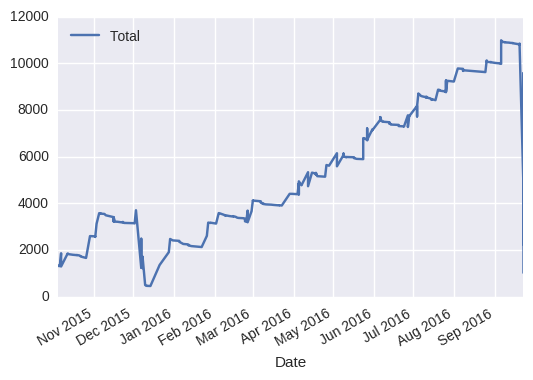

In [12]:
dft.plot(dft.index, 'Total')

## Mean Monthly Costs for Each Category

In [13]:
monthly_costs = pd.pivot_table(dft, columns='Category', index=pd.TimeGrouper('M'), values='Euros', aggfunc=np.sum)
del monthly_costs['Rent']
monthly_costs['Total'] = monthly_costs.sum(axis=1)
monthly_costs['Net'] = monthly_costs['Total'] + (310)
monthly_costs

Category,Groceries,Maintenance,Supplies,Utilities,Total,Net
Date,,,,,,
2015-10-31,-203.90,NaN,NaN,-69.85,-273.75,36.25
2015-11-30,-244.56,NaN,-164.68,-56.89,-466.13,-156.13
2015-12-31,-82.82,NaN,NaN,-77.49,-160.31,149.69
2016-01-31,-242.30,NaN,NaN,-75.99,-318.29,-8.29
2016-02-29,-249.10,-104.26,-8.98,-75.99,-438.33,-128.33
2016-03-31,-123.99,NaN,-21.96,-75.99,-221.94,88.06
2016-04-30,-274.24,NaN,NaN,-75.99,-350.23,-40.23
2016-05-31,-351.01,-11.56,NaN,-75.99,-438.56,-128.56
2016-06-30,-358.94,NaN,-25.94,-75.99,-460.87,-150.87


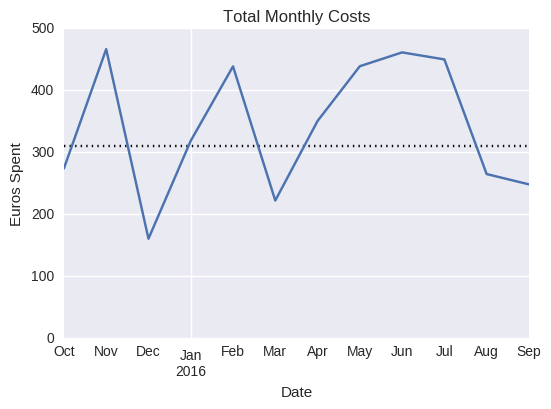

In [14]:
monthly_costs.Total.apply(lambda x: -x).plot()
plt.gca().set(
    title='Total Monthly Costs',
    ylabel='Euros Spent',
    ylim=(0, 500),
)

plt.hlines(310, *plt.gca().get_xlim(), linestyles='dotted')

In [ ]:
#     print(shop, data)
    if shop not in ['j.']:
        data = data.fillna(0)
        ss = data.resample('M').sum()
        ss.Euros.apply(lambda x: -x).plot(y='Euros', ax=ax, label=shop, legend=True)

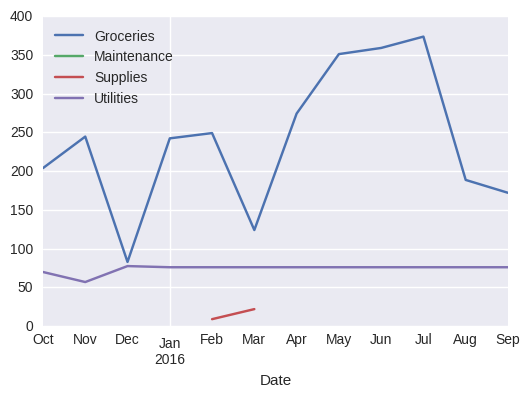

In [31]:
fig, ax = plt.subplots()
for cat, data in dft.groupby('Category'):
    if 'rent' not in cat.lower():
        ss = data.resample('M').sum()
        ss.Euros.apply(lambda x: -x).plot(ax=ax, label=cat, legend=True)

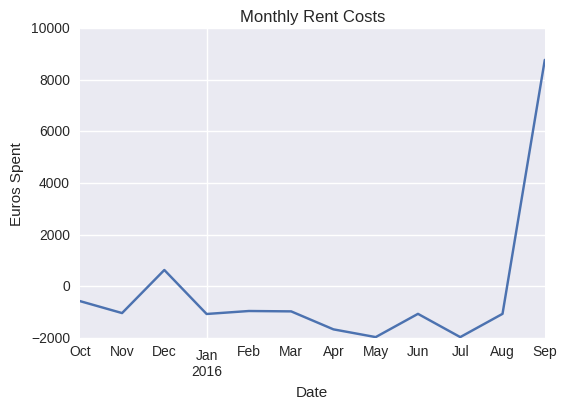

In [36]:
dft[dft.Category == 'Rent'].resample('M').sum().Euros.apply(lambda x: -x).plot()
plt.title('Monthly Rent Costs')
plt.ylabel('Euros Spent')

# Examine Grocery Costs

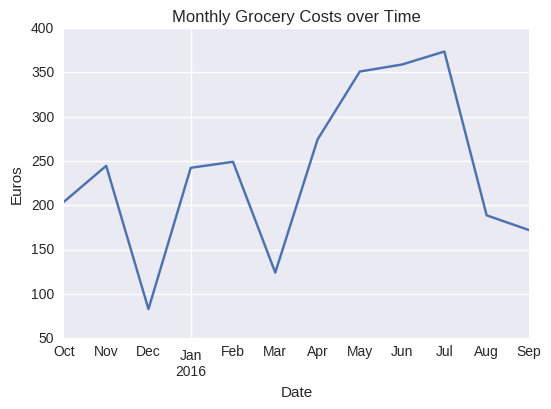

In [15]:
monthly_costs.Groceries.apply(lambda x: -x).plot()
plt.title('Monthly Grocery Costs over Time')
plt.ylabel('Euros')

In [43]:
dft[dft.Buchungstext.apply(lambda s: 'j.' in s.lower())]


,index,Total,Prefix,Vorgang,Buchungstext,Category,Euros
Date,,,,,,,
2016-05-31,418,7171.22,Auftraggeber,Lastschrift/Belast.,J. MELIC GMBH//PETERSHAUSEN/DE Kto/IBAN: DE79...,Groceries,-35.49
2016-06-14,434,7375.38,Auftraggeber,Lastschrift/Belast.,J. MELIC GMBH//PETERSHAUSEN/DE Kto/IBAN: DE79...,Groceries,-15.71


In [17]:
groc = dft[dft.Category == 'Groceries'].copy()
groc['Shop'] = groc.Buchungstext.apply(lambda s: s.split(' ')[1])
groc.ix[groc.Shop.isin(['628']), 'Shop'] = 'Edeka'
groc.Shop = groc.Shop.str.lower()
groc

,index,Total,Prefix,Vorgang,Buchungstext,Category,Euros,Shop
Date,,,,,,,,
2015-10-05,260,1330.43,Auftraggeber,Lastschrift/Belast.,ORTERER9120 Buchungstext: ELV94312605 02.10 1...,Groceries,-18.59,orterer9120
2015-10-05,261,1314.73,Auftraggeber,Lastschrift/Belast.,NETTO SAGT DANKE NMD8448 Buchungstext: 021019...,Groceries,-15.70,netto
2015-10-06,262,1308.50,Auftraggeber,Lastschrift/Belast.,628 EDEKA MUENCHEN GUARDINI Buchungstext: EC ...,Groceries,-6.23,edeka
2015-10-07,263,1293.65,Auftraggeber,Lastschrift/Belast.,NETTO SAGT DANKE NMD8448 Buchungstext: 061016...,Groceries,-14.85,netto
2015-10-12,265,1849.74,Auftraggeber,Lastschrift/Belast.,NETTO SAGT DANKE NMD8448 Buchungstext: 101019...,Groceries,-8.91,netto
2015-10-12,266,1841.78,Auftraggeber,Lastschrift/Belast.,NETTO SAGT DANKE NMD8448 Buchungstext: 091014...,Groceries,-7.96,netto
2015-10-13,267,1818.15,Auftraggeber,Lastschrift/Belast.,PENNY SAGT DANKE. 66300198 Buchungstext: 1210...,Groceries,-23.63,penny
2015-10-16,268,1794.34,Auftraggeber,Lastschrift/Belast.,628 EDEKA MUENCHEN GUARDINI Buchungstext: EC ...,Groceries,-23.81,edeka
2015-10-19,270,1778.13,Auftraggeber,Lastschrift/Belast.,628 EDEKA MUENCHEN GUARDINI Buchungstext: EC ...,Groceries,-6.31,edeka


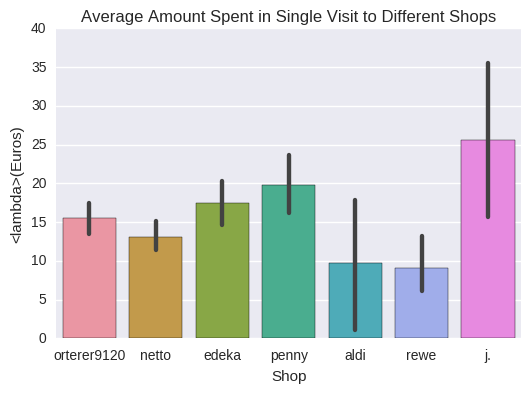

In [18]:
sns.barplot(x='Shop', y='Euros', data=groc, estimator=lambda x: -np.mean(x))
plt.title('Average Amount Spent in Single Visit to Different Shops')

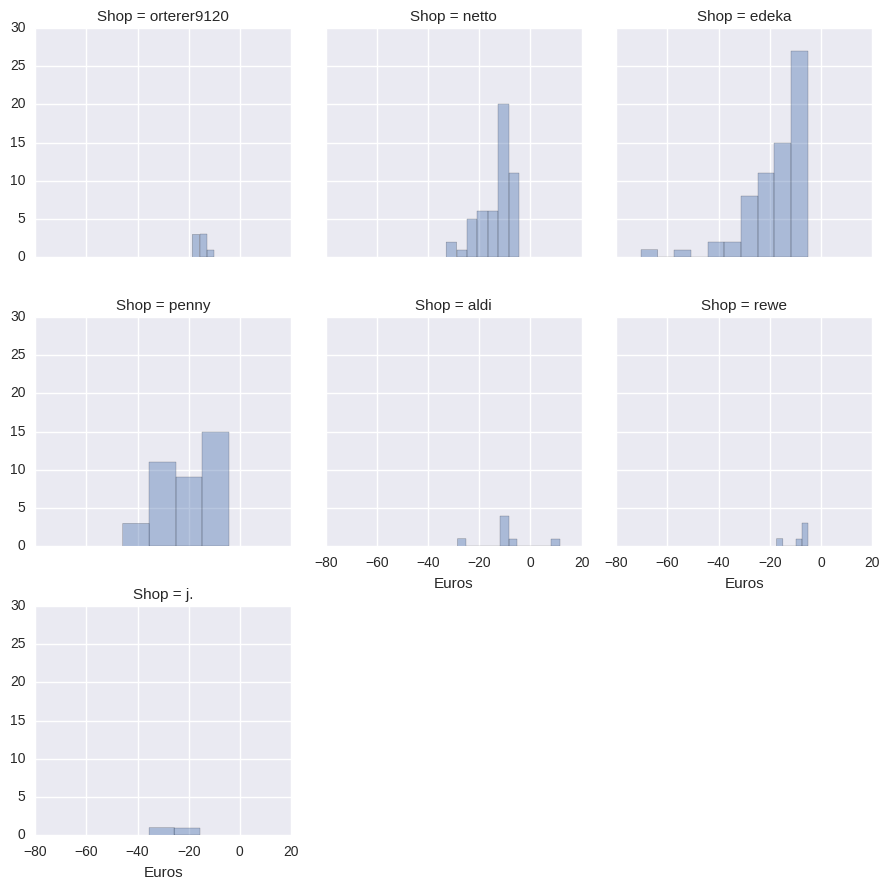

In [48]:
g = sns.FacetGrid(col='Shop', col_wrap=3, data=groc, )
g.map(sns.distplot, 'Euros', kde=False)

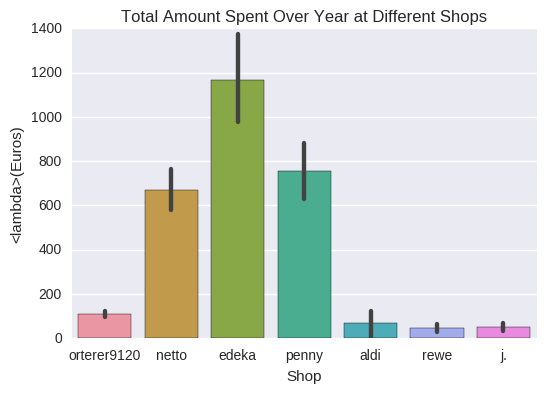

In [19]:
sns.barplot(x='Shop', y='Euros', data=groc, estimator=lambda x: -np.sum(x))
plt.title('Total Amount Spent Over Year at Different Shops')

In [26]:
groc_monthly = pd.pivot_table(data=groc,
               columns='Shop',
               index=pd.TimeGrouper('M'),
               values='Euros', 
               aggfunc=np.nansum)

groc_monthly = groc_monthly.fillna(0)
groc_monthly

Shop,aldi,edeka,j.,netto,orterer9120,penny,rewe
Date,,,,,,,
2015-10-31,0.00,-50.56,0.00,-75.79,-18.59,-58.96,0.00
2015-11-30,0.00,-157.48,0.00,-72.96,-14.12,0.00,0.00
2015-12-31,0.00,-20.33,0.00,-62.49,0.00,0.00,0.00
2016-01-31,0.00,-86.04,0.00,-79.19,-32.63,-44.44,0.00
2016-02-29,0.00,-68.89,0.00,-131.40,0.00,-48.81,0.00
2016-03-31,0.00,-78.66,0.00,-45.33,0.00,0.00,0.00
2016-04-30,-7.06,-65.46,0.00,-69.48,-15.07,-117.17,0.00
2016-05-31,-11.45,-83.51,-35.49,-24.13,0.00,-160.46,-35.97
2016-06-30,-21.24,-180.24,-15.71,-42.77,0.00,-98.98,0.00


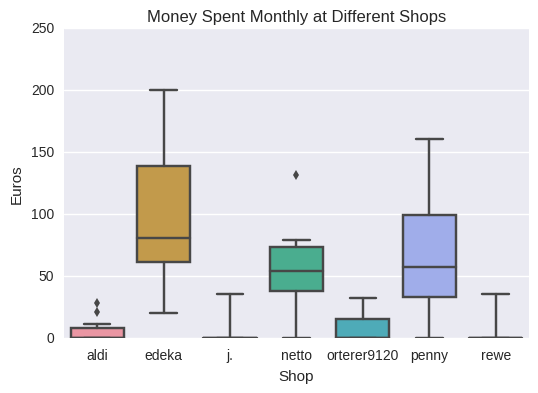

In [27]:
groc_monthly_long = pd.melt(groc_monthly.reset_index(), id_vars=['Date'], value_name='Euros').dropna()
groc_monthly_long.Euros *= -1
sns.boxplot(x='Shop', y='Euros', data=groc_monthly_long)
plt.title('Money Spent Monthly at Different Shops')

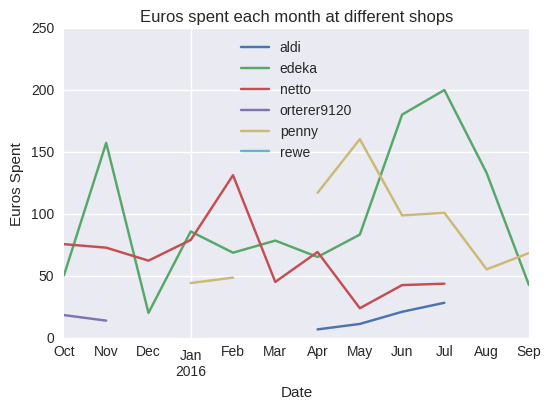

In [28]:
fig, ax = plt.subplots()
for shop, data in groc.groupby('Shop'):
#     print(shop, data)
    if shop not in ['j.']:
        data = data.fillna(0)
        ss = data.resample('M').sum()
        ss.Euros.apply(lambda x: -x).plot(y='Euros', ax=ax, label=shop, legend=True)
    
ll =ax.lines[0]

ax.set(
    title='Euros spent each month at different shops',
    ylabel='Euros Spent',
)

In [23]:
ll.set_marker

<bound method Line2D.set_marker of <matplotlib.lines.Line2D object at 0x7fdd4945c790>>

In [24]:
ll.markers['+']

u'plus'